In [ ]:
install.packages("googledrive")
library("googledrive")

if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")){ 
  print("hi")
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE)
}        

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "hi"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.11.0 (2021-09-26 08:30:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




In [ ]:
untar("gplus.tar.gz")

In [ ]:
# # Install Necessary Packages
install.packages("igraph")
install.packages("Matrix")
install.packages("pracma")
install.packages("entropy")
install.packages('infotheo')
install.packages('R.utils')

# Load Packages 
library('igraph')
library('Matrix')
library('pracma')
library('igraph')
library('entropy')
library('infotheo')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following object is masked from ‘package:R.oo’:

    hierarchy


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



Attaching package: ‘infotheo’


The following objects are masked from ‘package:entropy’:

    discretize, entropy




In [ ]:
library('igraph')
library('Matrix')
library('pracma')
library('R.utils')

In [ ]:
# Q18
counter = 0
for (file in list.files(path="gplus", pattern="*.circles")) {
  file = paste("gplus", file, sep="/")
  if (length(readLines(file)) > 2) {
    counter = counter + 1
  }
}
counter

[1] 57

[1] "109327480479767108490"


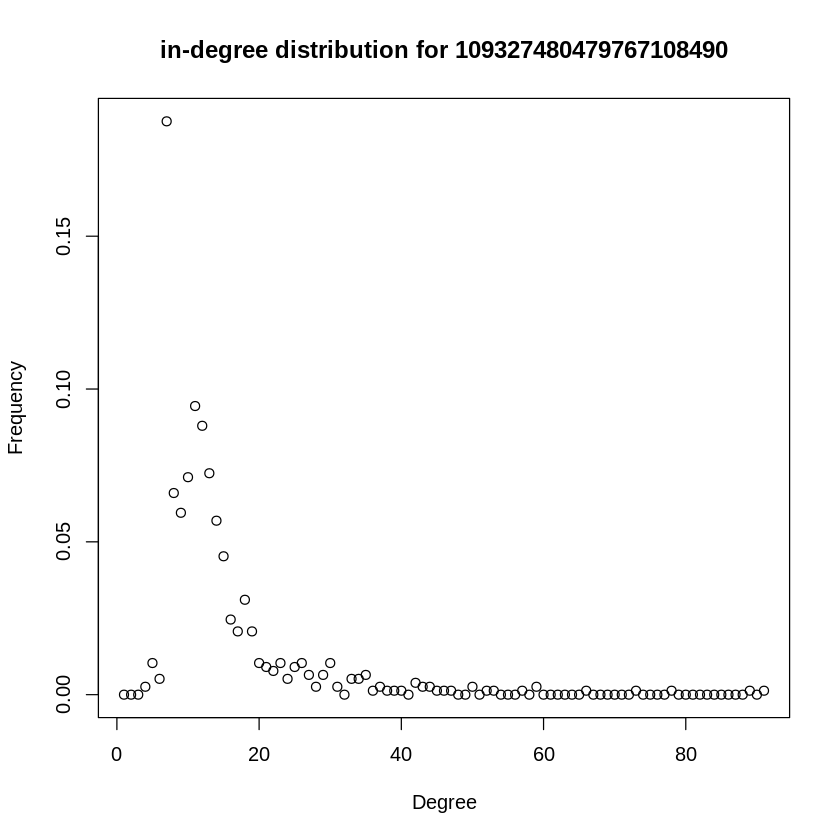

[1] "115625564993990145546"


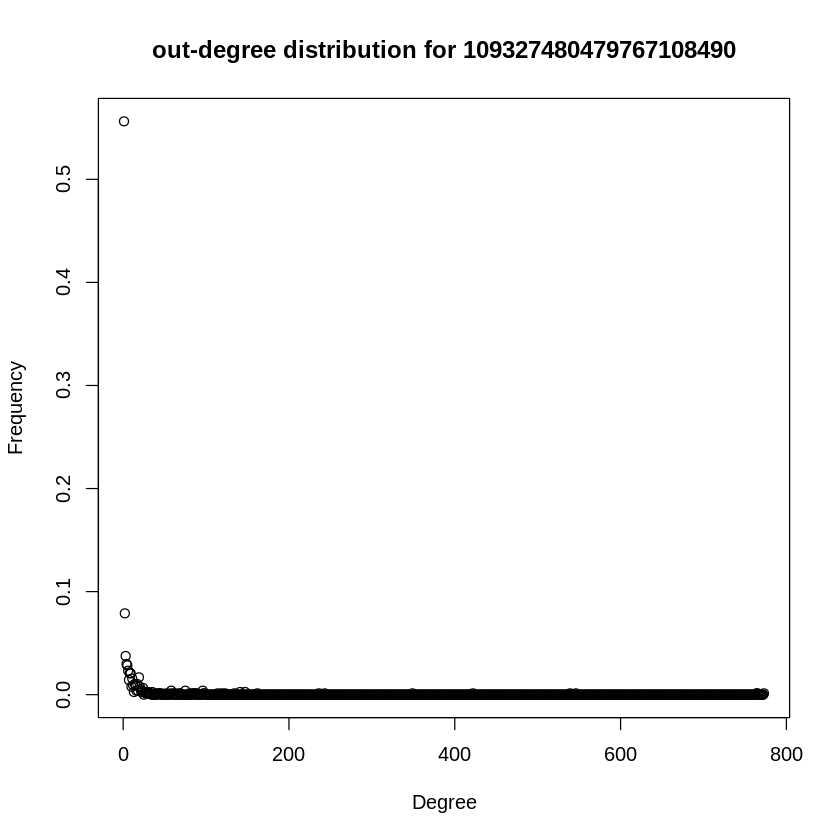

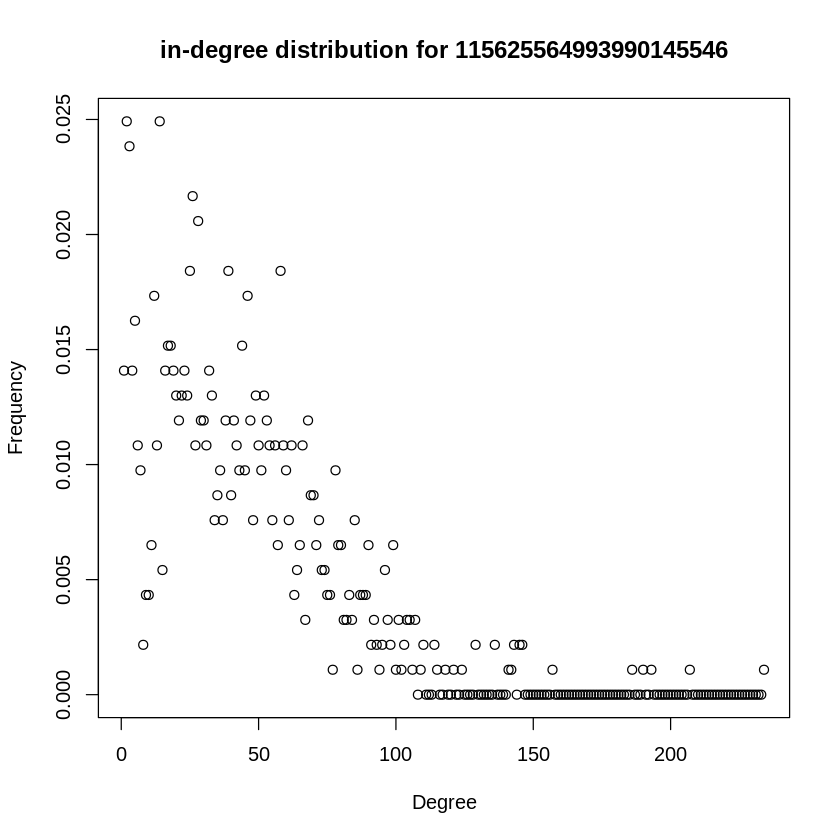

[1] "101373961279443806744"


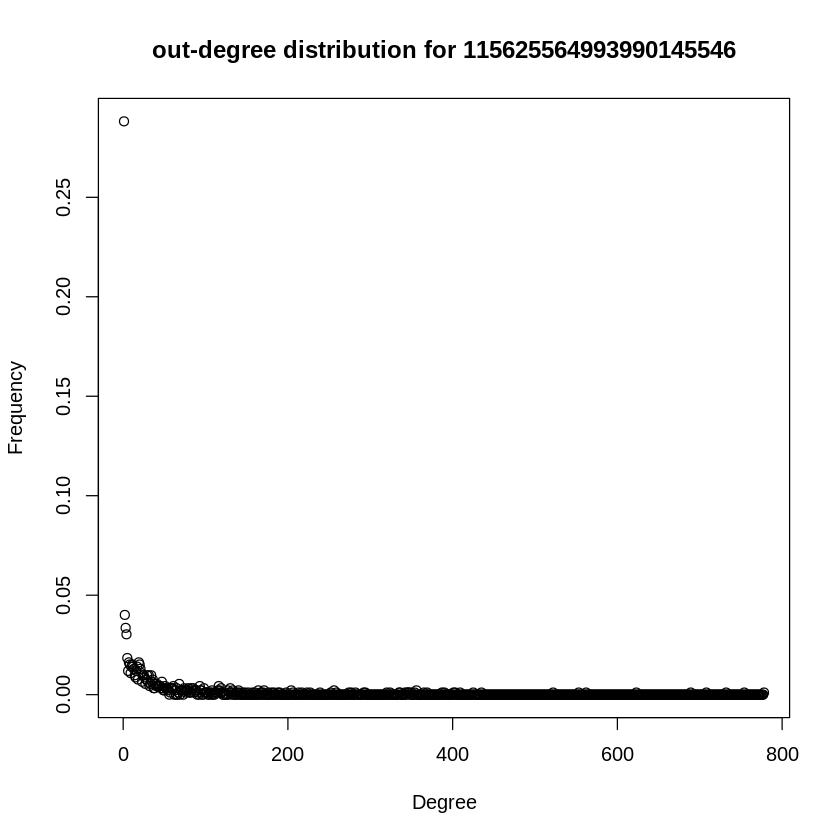

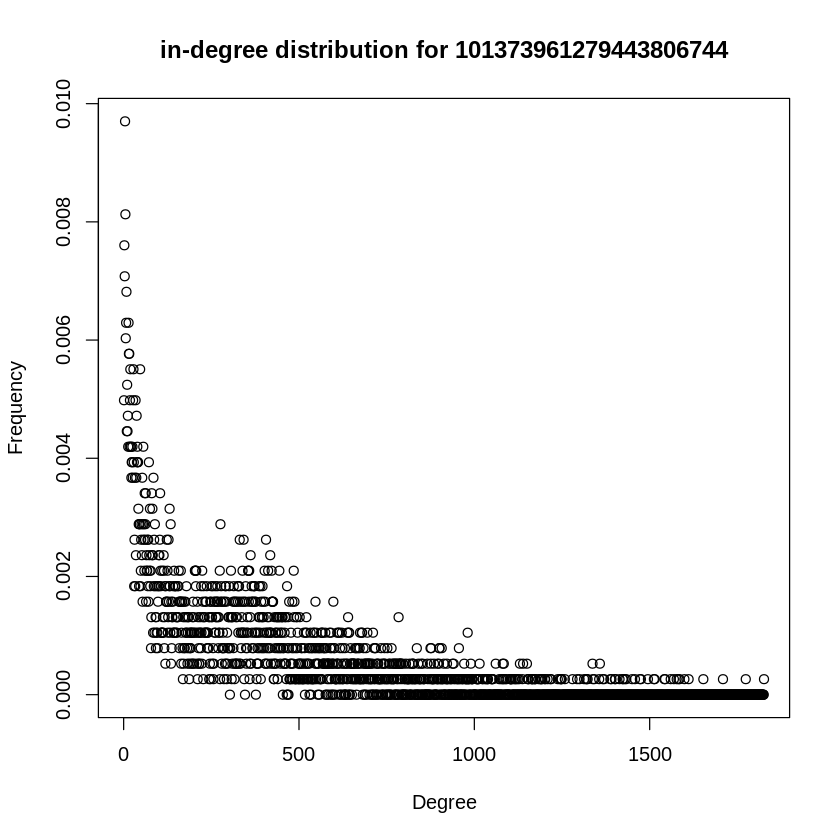

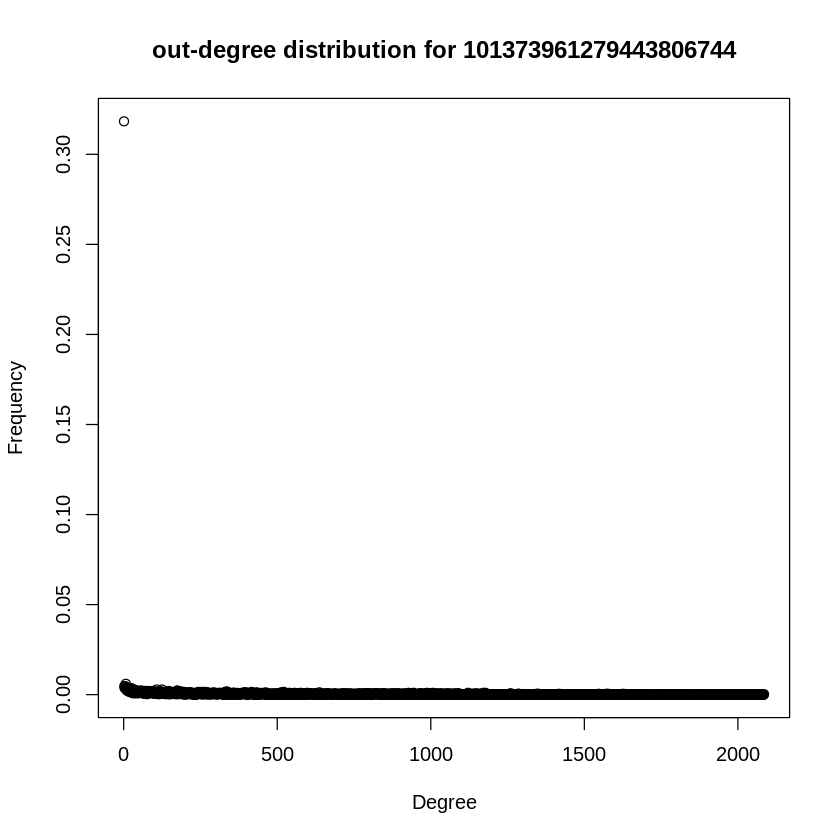

In [ ]:
# Q19

for (node in c("109327480479767108490","115625564993990145546","101373961279443806744")) {
  print(node)
  edges <- read.table(paste("gplus/", node, ".edges", sep=""))
  graph <- graph_from_data_frame(edges, directed=TRUE)
  plot(degree_distribution(graph, mode = "in"),main=paste("in-degree distribution for ", node, sep=""), xlab="Degree", ylab="Frequency")
  plot(degree_distribution(graph, mode = "out"),main=paste("out-degree distribution for ", node, sep=""), xlab="Degree", ylab="Frequency")

}

[1] "109327480479767108490"
[1] 0.2798194
[1] "115625564993990145546"
[1] 0.3230868


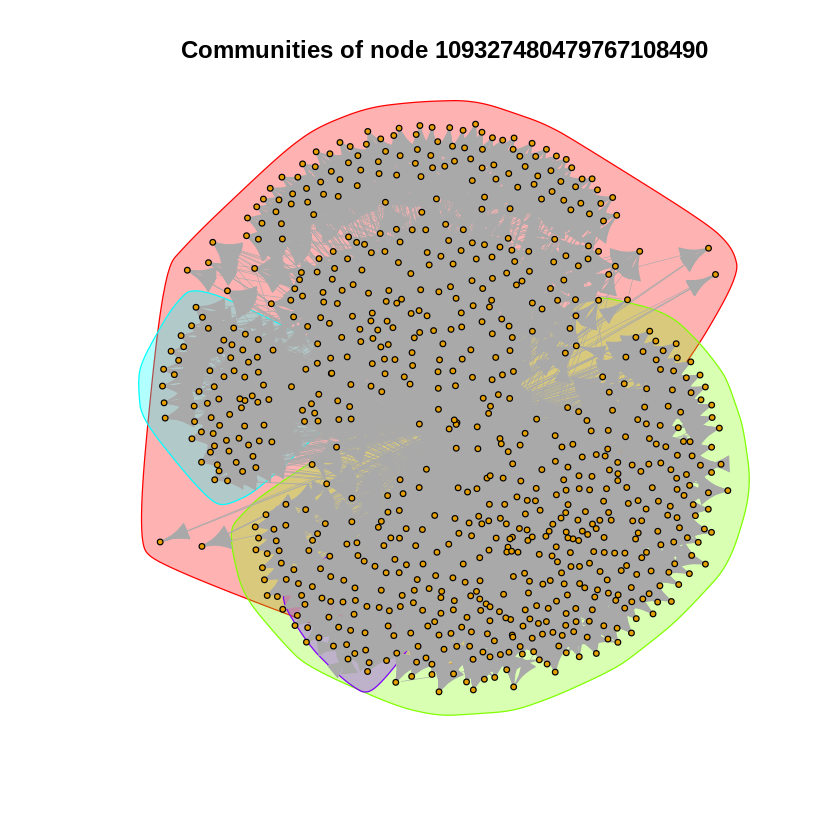

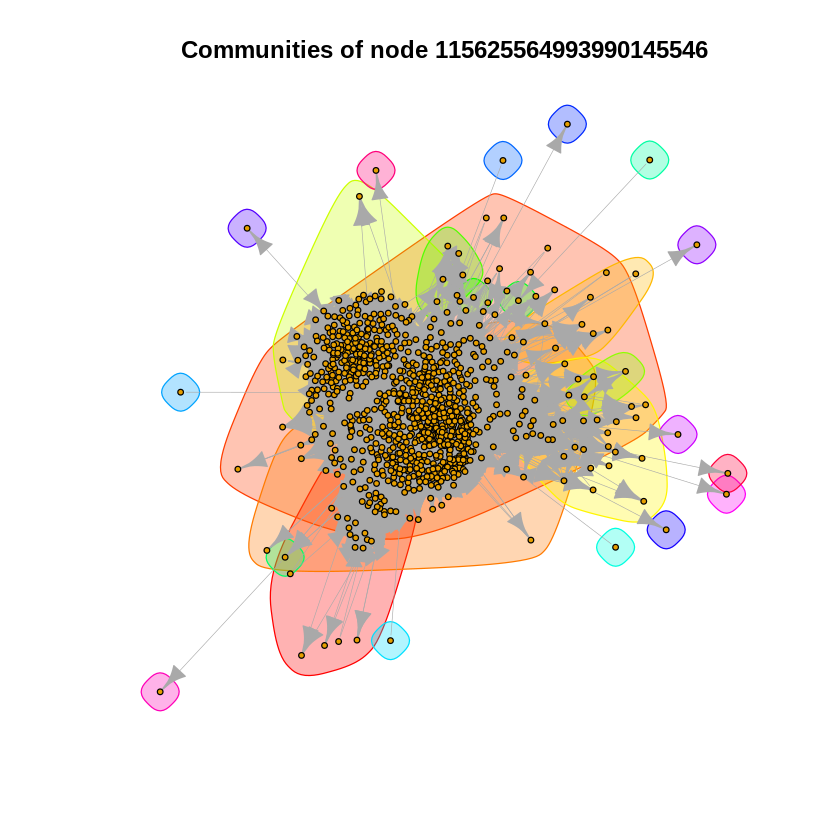

In [ ]:
# Q20

for (node in c("109327480479767108490","115625564993990145546")) {
  print(node)
  edges <- read.table(paste("gplus/", node, ".edges", sep=""))
  graph <- graph_from_data_frame(edges, directed=TRUE)

  cluster = cluster_walktrap(graph)

  print(modularity(cluster))

  plot(graph, mark.groups=cluster,edge.width=0.5, vertex.size=2, vertex.label="",main = paste("Communities of node ", node, sep=""))

}

[1] "101373961279443806744"
[1] 0.1950912


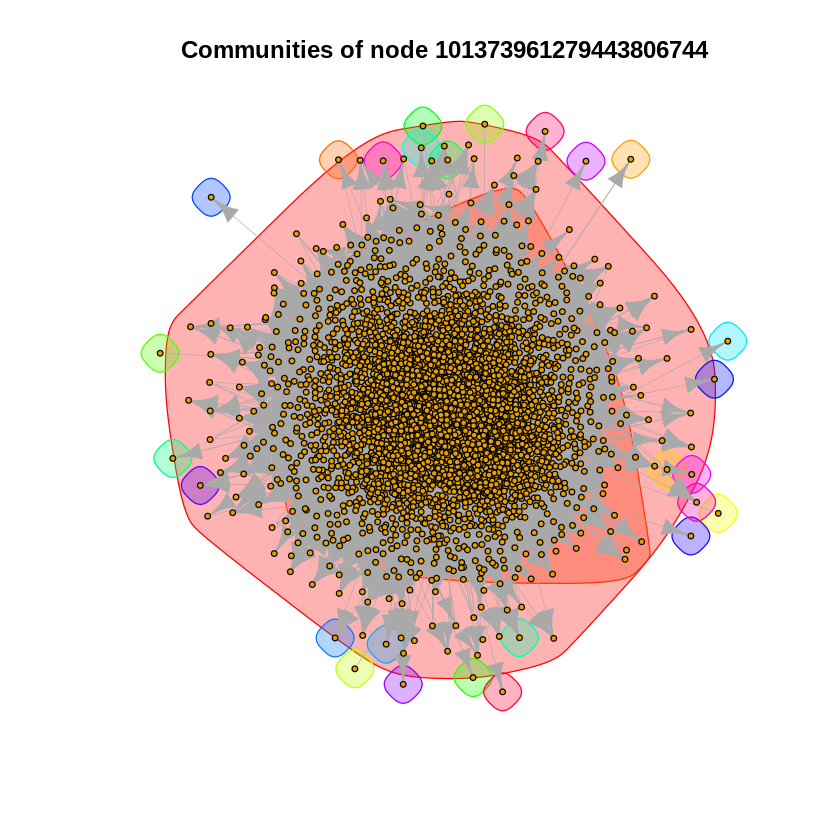

In [ ]:
for (node in c("101373961279443806744")) {
  print(node)
  edges <- read.table(paste("gplus/", node, ".edges", sep=""))
  graph <- graph_from_data_frame(edges, directed=TRUE)

  cluster = cluster_walktrap(graph)

  print(modularity(cluster))

  plot(graph, mark.groups=cluster,edge.width=0.5, vertex.size=2, vertex.label="",main = paste("Communities of node ", node, sep=""))
}

In [ ]:
# Q22
for (node in c("109327480479767108490","115625564993990145546")) {
  circleLines <- readLines(paste("gplus/", node, ".circles", sep=""))
  circles = list()
  for (i in 1:length(circleLines)) {
      circle_nodes = strsplit(circleLines[i],"\t")
      circles = c(circles, list(circle_nodes[[1]][-1]))
  }

  N = length(unique(unlist(circles, recursive=TRUE)))

  h_c = 0
  h_c_k = 0
  h_k_c = 0
  h_k = 0

  for (i in 1:length(circles)) {
    a_i = length(unlist(circles[i]))
    h_c = h_c + (a_i / N * log10(a_i / N))
  }
  h_c = h_c*-1

  graph = read_graph(paste("gplus/", node, ".edges", sep=""), format="ncol", directed=TRUE)
  graph = add.vertices(graph, nv=1, name=node)
  nodeIndex = which(V(graph)$name==node) 
  edges = list()
  for (vertex in 1:(vcount(graph) - 1)) {
      edges = c(edges, c(nodeIndex, vertex))
  }
  graph = add_edges(graph, edges)
  community = walktrap.community(graph)

  for (j in 1:max(community$membership)){
      nodes = V(graph)$name[which(community$membership == j)]
      b_j = length(intersect(nodes, unique(unlist(circles, recursive=TRUE))))
      if (b_j != 0) {
          h_k = h_k - ((b_j/N) * log10(b_j/N))
          for (i in 1:length(circles)) {
              a_ji = length(unique(intersect(nodes, circles[[i]])))
              a_i = length(circles[[i]])
              if(a_ji != 0){
                  h_c_k = h_c_k - ((a_ji/N)*log10(a_ji/b_j))
                  h_k_c = h_k_c - ((a_ji/N)*log10(a_ji/a_i))
              }
          }
      }
  }

  homogenity = 1 - (h_c_k/h_c)
  completeness = 1 - (h_k_c/h_k)
  print(node)
  print(homogenity)
  print(completeness)
}

[1] "109327480479767108490"
[1] 0.8518851
[1] 0.3298739
[1] "115625564993990145546"
[1] 0.4518903
[1] -3.423962


In [ ]:
# Q22
for (node in c("101373961279443806744")) {
  circleLines <- readLines(paste("gplus/", node, ".circles", sep=""))
  circles = list()
  for (i in 1:length(circleLines)) {
      circle_nodes = strsplit(circleLines[i],"\t")
      circles = c(circles, list(circle_nodes[[1]][-1]))
  }

  N = length(unique(unlist(circles, recursive=TRUE)))

  h_c = 0
  h_c_k = 0
  h_k_c = 0
  h_k = 0

  for (i in 1:length(circles)) {
    a_i = length(unlist(circles[i]))
    h_c = h_c + (a_i / N * log10(a_i / N))
  }
  h_c = h_c*-1

  graph = read_graph(paste("gplus/", node, ".edges", sep=""), format="ncol", directed=TRUE)
  graph = add.vertices(graph, nv=1, name=node)
  nodeIndex = which(V(graph)$name==node) 
  edges = list()
  for (vertex in 1:(vcount(graph) - 1)) {
      edges = c(edges, c(nodeIndex, vertex))
  }
  graph = add_edges(graph, edges)
  community = walktrap.community(graph)

  for (j in 1:max(community$membership)){
      nodes = V(graph)$name[which(community$membership == j)]
      b_j = length(intersect(nodes, unique(unlist(circles, recursive=TRUE))))
      if (b_j != 0) {
          h_k = h_k - ((b_j/N) * log10(b_j/N))
          for (i in 1:length(circles)) {
              a_ji = length(unique(intersect(nodes, circles[[i]])))
              a_i = length(circles[[i]])
              if(a_ji != 0){
                  h_c_k = h_c_k - ((a_ji/N)*log10(a_ji/b_j))
                  h_k_c = h_k_c - ((a_ji/N)*log10(a_ji/a_i))
              }
          }
      }
  }

  homogenity = 1 - (h_c_k/h_c)
  completeness = 1 - (h_k_c/h_k)
  print(node)
  print(homogenity)
  print(completeness)
}

[1] "101373961279443806744"
[1] 0.003866707
[1] -1.504238
